                                                      Bike Sharing Report

# Data Preprocessing

# Importing Libraries
Importing the useful libraries which is require for analysis of data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
dframe = pd.read_csv("C:/Users/gagan/Desktop/bike_dataset/hour.csv")
dframe.shape

(17379, 17)

In [3]:
dframe.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


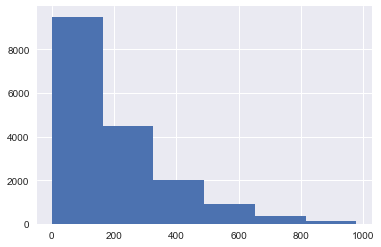

In [8]:
plt.hist(dframe.cnt,bins=6)
plt.show()

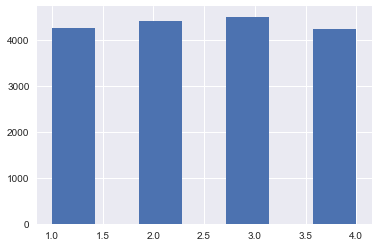

In [19]:
plt.hist(dframe.season,bins=7)
plt.show()

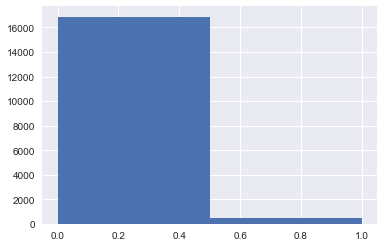

In [13]:
plt.hist(dframe.holiday,bins=2)
plt.show()

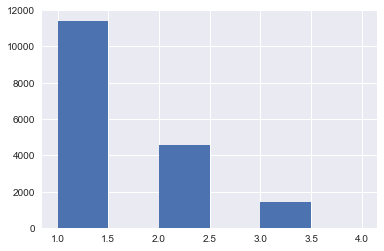

In [21]:
plt.hist(dframe.weathersit,bins=6)
plt.show()

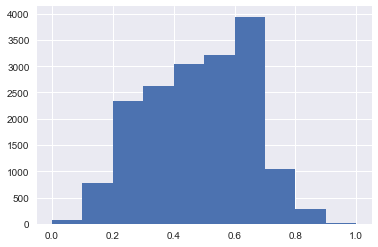

In [23]:
plt.hist(dframe.atemp,bins=10)
plt.show()

In [24]:
dframe.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [25]:
dframe.drop(["instant"], axis=1, inplace=True)

In [26]:
dframe.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Taking Care of Missing values


In [27]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [28]:
dframe.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [29]:
dframe["date"] = dframe.dteday.apply(lambda x : x.split('-')[2])

In [219]:
dframe.date.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

# Outliers Checking

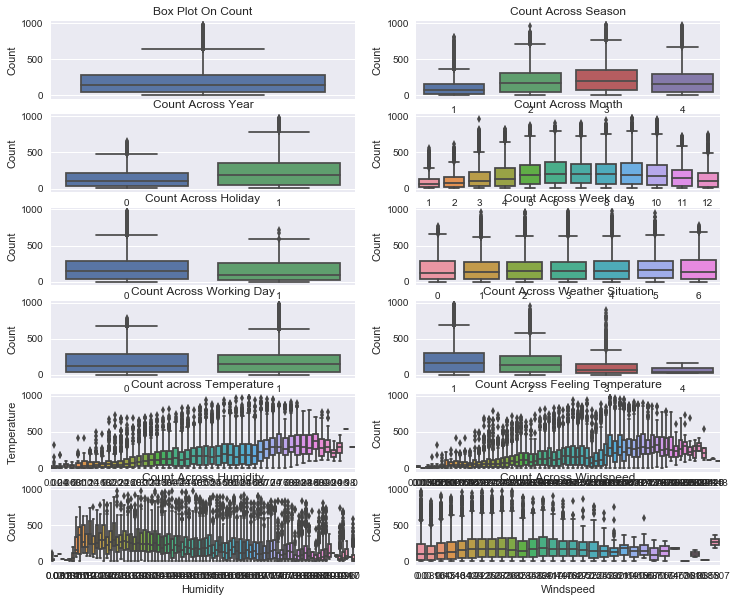

In [30]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=dframe,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=dframe,y="cnt",x="season", orient="v",ax=axes[0][1])
sns.boxplot(data=dframe,y="cnt",x="yr",orient="v",ax=axes[1][0])
sns.boxplot(data=dframe,y="cnt",x="mnth",orient="v",ax=axes[1][1])
sns.boxplot(data=dframe,y="cnt",x="holiday",orient="v",ax=axes[2][0])
sns.boxplot(data=dframe,y="cnt",x="weekday", orient="v",ax=axes[2][1])
sns.boxplot(data=dframe,y="cnt",x="workingday",orient="v",ax=axes[3][0])
sns.boxplot(data=dframe,y="cnt",x="weathersit",orient="v",ax=axes[3][1])
sns.boxplot(data=dframe,y="cnt",x="temp",orient="v",ax=axes[4][0])
sns.boxplot(data=dframe,y="cnt",x="atemp",orient="v",ax=axes[4][1])
sns.boxplot(data=dframe,y="cnt",x="hum",orient="v",ax=axes[5][0])
sns.boxplot(data=dframe,y="cnt",x="windspeed",orient="v",ax=axes[5][1])
axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Count Across Season")
axes[1][0].set(xlabel='Year', ylabel='Count',title="Count Across Year")
axes[1][1].set(xlabel='Month', ylabel='Count',title="Count Across Month")
axes[2][0].set(xlabel='Holiday', ylabel='Count',title="Count Across Holiday")
axes[2][1].set(xlabel='Week Day', ylabel='Count',title="Count Across Week day")
axes[3][0].set(xlabel='Working Day', ylabel='Count',title="Count Across Working Day")
axes[3][1].set(xlabel='Weather Situation', ylabel='Count',title="Count Across Weather Situation")
axes[4][0].set(ylabel='Temperature',title="Count across Temperature")
axes[4][1].set(xlabel='Feeling Temp', ylabel='Count',title="Count Across Feeling Temperature")
axes[5][0].set(xlabel='Humidity', ylabel='Count',title="Count Across Humidity")
axes[5][1].set(xlabel='Windspeed', ylabel='Count',title="Count Across Windspeed")

In [31]:
dframe.shape

(17379, 17)

In [32]:
dframe = dframe[np.abs(dframe["cnt"]-dframe["cnt"].mean())<=(3*dframe["cnt"].std())] 

In [33]:
dframe.shape

(17135, 17)

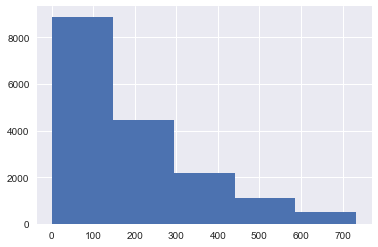

In [37]:
plt.hist(dframe.cnt,bins=5)
plt.show()

# Visualizing the correlation matrix

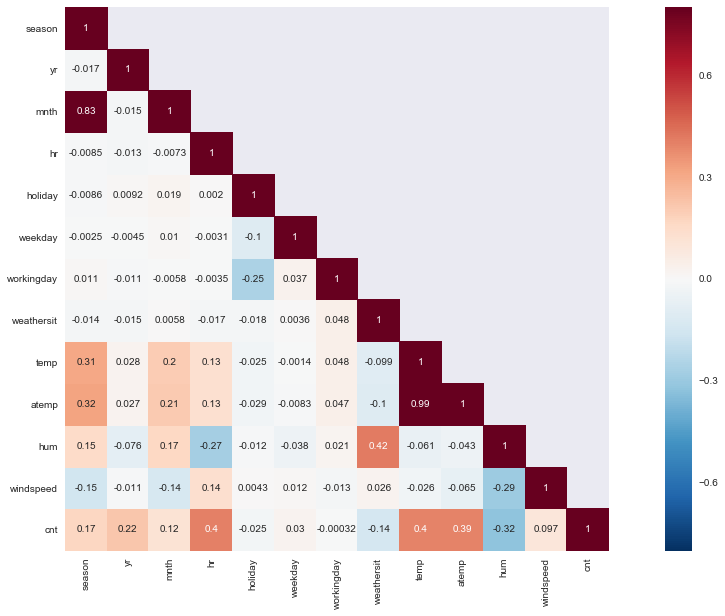

In [224]:
corrMatt = dframe[['date', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'cnt']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

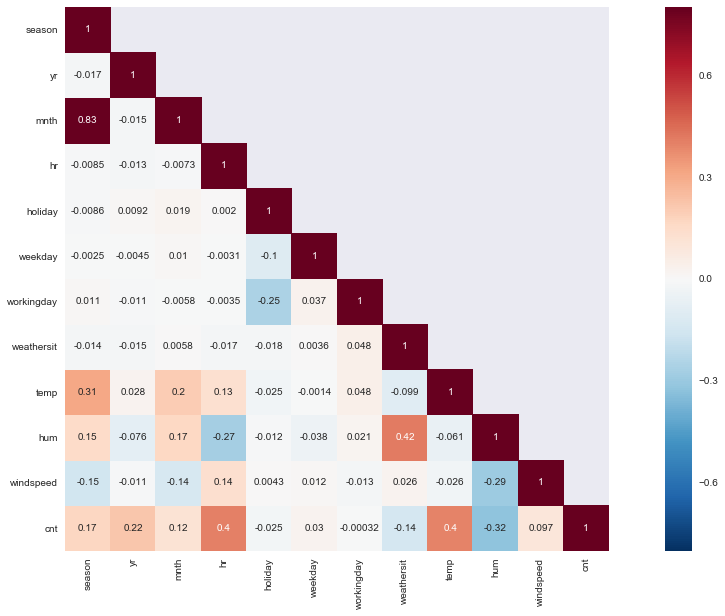

In [225]:
corrMatt = dframe[['date', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
        'cnt']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

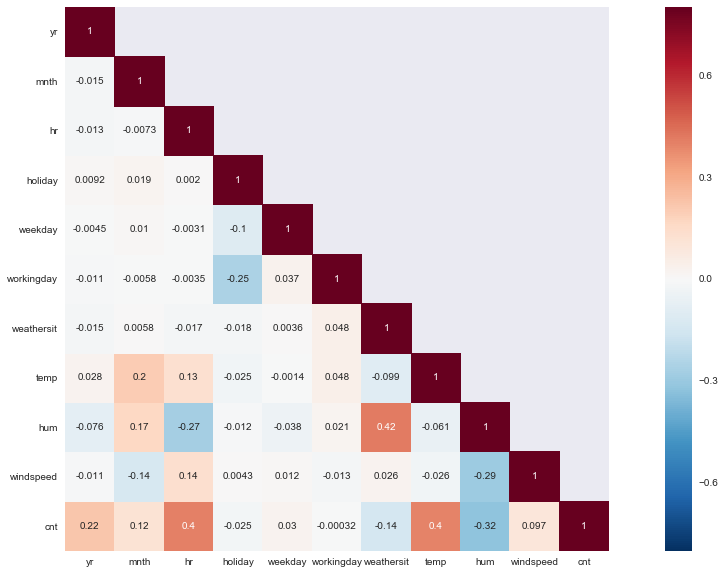

In [226]:
corrMatt = dframe[['date', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
        'cnt']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [227]:
dframe = dframe[['date', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
        'cnt']]

In [228]:
dframe.head() # Features Selected After Correlation

,date,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,01,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,01,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,01,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,01,0,1,4,0,6,0,1,0.24,0.75,0.0,1


# Taking out most important features

In this we are taking out most important features using decision tree classifier

Feature ranking:
1. feature 3 (0.617730)
2. feature 6 (0.158367)
3. feature 2 (0.099520)
4. feature 8 (0.062662)
5. feature 1 (0.054563)
6. feature 5 (0.007157)
7. feature 10 (0.000000)
8. feature 9 (0.000000)
9. feature 7 (0.000000)
10. feature 4 (0.000000)
11. feature 0 (0.000000)


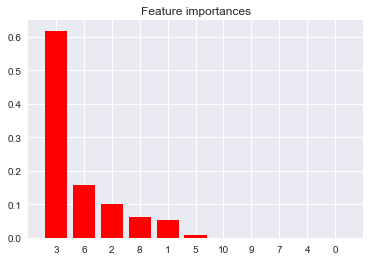

In [229]:
from sklearn import tree

y = dframe.cnt.values
X = dframe[['date', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed']].values

# Build a forest and compute the feature importances

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [232]:
imp_cols = ['yr', 'mnth', 'workingday', 'temp', 'weekday']
X = dframe[imp_cols]
y = dframe.hr
X.describe()

,yr,mnth,workingday,temp,weekday
count,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000
mean,0.495477,6.522264,0.678669,0.494417,3.003793
std,0.499994,3.451943,0.467001,0.192284,2.013274
min,0.000000,1.000000,0.000000,0.020000,0.000000
25%,0.000000,4.000000,0.000000,0.340000,1.000000
50%,0.000000,7.000000,1.000000,0.500000,3.000000
75%,1.000000,10.000000,1.000000,0.640000,5.000000
max,1.000000,12.000000,1.000000,1.000000,6.000000


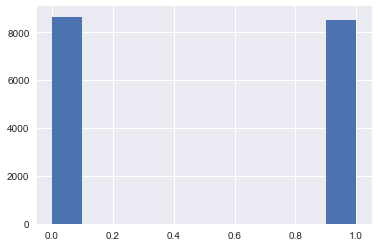

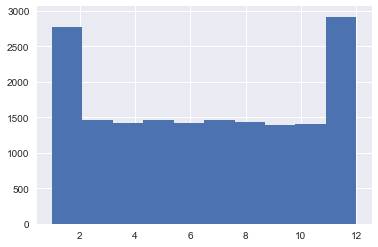

In [39]:
plt.hist(dframe.yr,bins=10)
plt.show()

plt.hist(dframe.mnth,bins=10)
plt.show()

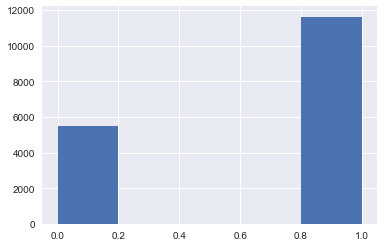

In [41]:
plt.hist(dframe.workingday,bins=5)
plt.show()

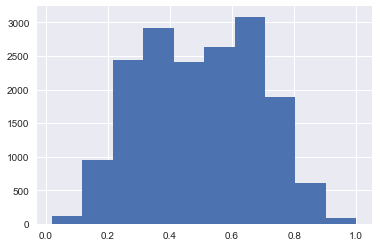

In [43]:
plt.hist(dframe.temp,bins=10)
plt.show()

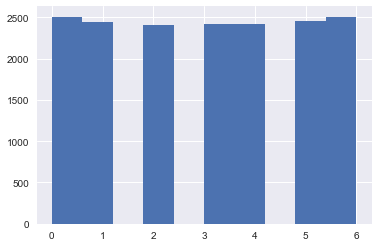

In [44]:
plt.hist(dframe.weekday,bins=10)
plt.show()

# Report mean, average, median, variance values

In [233]:
X.median()

yr            0.0
mnth          7.0
workingday    1.0
temp          0.5
weekday       3.0
dtype: float64

In [234]:
X.var()

yr             0.249994
mnth          11.915913
workingday     0.218090
temp           0.036973
weekday        4.053271
dtype: float64

In [235]:
X.mean()

yr            0.495477
mnth          6.522264
workingday    0.678669
temp          0.494417
weekday       3.003793
dtype: float64

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=None)
pca.fit_transform(X_train)
pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[ 0.24063881  0.20712564  0.19889206  0.19533329  0.15801021]


# Training and Testing

# Appling multivariate regression or classification
Here we are using three algorithms 1.Linear Regression 2.Support Vector Regression 3.Random Forest Regression
As in this data we have to predict a numeric value which means our response variable is continous variable so we will use a these tree algorithms which is best suitable to predict the result.

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

for i in range(1, 6):
    print("No. of Components", i)
    # Applying PCA
    pca=PCA(n_components=i)
    x_train = pca.fit_transform(X_train)
    x_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    print("CoVariance:", sum(explained_variance)*100)

    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    print("Linear Regressor Accuracy Score:", regressor.score(x_test, y_test)*100)

    regressor = RandomForestRegressor()
    regressor.fit(x_train, y_train)
    print("Random Forest Accuracy Score:", regressor.score(x_test, y_test)*100)

    regressor = SVR(kernel='linear')
    regressor.fit(x_train, y_train)
    print("SVR Accuracy Score:", regressor.score(x_test, y_test)*100)


No. of Components 1
CoVariance: 24.0638807276
Linear Regressor Accuracy Score: 0.764251164881
Random Forest Accuracy Score: 7.43661577959
SVR Accuracy Score: 0.322979339073
No. of Components 2
CoVariance: 44.7764446324
Linear Regressor Accuracy Score: 0.681462031397
Random Forest Accuracy Score: 8.49449462541
SVR Accuracy Score: 0.141045079129
No. of Components 3
CoVariance: 64.6656504277
Linear Regressor Accuracy Score: 0.66976135796
Random Forest Accuracy Score: 10.7037307511
SVR Accuracy Score: 0.103587118276
No. of Components 4
CoVariance: 84.1989790293
Linear Regressor Accuracy Score: 0.660300790431
Random Forest Accuracy Score: 10.2881158462
SVR Accuracy Score: 0.083497850668
No. of Components 5
CoVariance: 100.0
Linear Regressor Accuracy Score: 1.52305873957
Random Forest Accuracy Score: 11.3388927779
SVR Accuracy Score: 0.0514821431682


Above we are Applying Principal Component analysis to adjust model complexity of your prediction algorithm.Repeating the experiment with different covariance matrices and report differences in your results with your test set.

Linear Regressor Accuracy Score: 1.52305873957
Random Forest Accuracy Score: 11.3388927779
SVR Accuracy Score: 0.0514821431682
